In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [31]:
data = pd.read_csv('Iris.csv', index_col=0)

In [32]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [34]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:

data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [36]:
Iris_Species_Map = {
    'Iris-setosa': 1,
    'Iris-versicolor':2,
    'Iris-virginica': 3
}

data.Species = data.Species.map(Iris_Species_Map)

In [37]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,1
2,4.9,3.0,1.4,0.2,1
3,4.7,3.2,1.3,0.2,1
4,4.6,3.1,1.5,0.2,1
5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,3
147,6.3,2.5,5.0,1.9,3
148,6.5,3.0,5.2,2.0,3


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = data.drop('Species', axis=1).values
y = data['Species'].values

X_train, X_test, Y_train, Y_test= train_test_split = train_test_split(X, y, test_size= 0.2, random_state=14)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold


In [48]:
neighbors = np.arange(1,17)
cv_scores ={}


for neighbor in neighbors:
    steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors=neighbor))]
    pipeline = Pipeline(steps)

    kf = KFold(n_splits=4, shuffle=True, random_state=30)
    cv_scoree = cross_val_score(pipeline, X, y, cv=kf)
    cv_scores[f'{neighbor} neigbours'] = cv_scoree


In [49]:
cv_scores

{'1 neigbours': array([0.92105263, 0.92105263, 0.97297297, 0.94594595]),
 '2 neigbours': array([0.92105263, 0.97368421, 0.91891892, 0.94594595]),
 '3 neigbours': array([0.92105263, 0.94736842, 0.94594595, 0.94594595]),
 '4 neigbours': array([0.97368421, 0.92105263, 0.94594595, 0.94594595]),
 '5 neigbours': array([0.97368421, 0.94736842, 0.97297297, 0.94594595]),
 '6 neigbours': array([0.94736842, 0.94736842, 0.97297297, 0.94594595]),
 '7 neigbours': array([0.94736842, 0.92105263, 0.97297297, 0.97297297]),
 '8 neigbours': array([0.94736842, 0.94736842, 0.97297297, 0.94594595]),
 '9 neigbours': array([0.94736842, 0.97368421, 0.97297297, 0.97297297]),
 '10 neigbours': array([0.94736842, 0.97368421, 0.97297297, 0.97297297]),
 '11 neigbours': array([0.94736842, 0.97368421, 0.97297297, 0.97297297]),
 '12 neigbours': array([0.94736842, 0.97368421, 0.97297297, 0.97297297]),
 '13 neigbours': array([0.94736842, 0.94736842, 0.97297297, 0.97297297]),
 '14 neigbours': array([0.94736842, 0.97368421,

<function matplotlib.pyplot.show(close=None, block=None)>

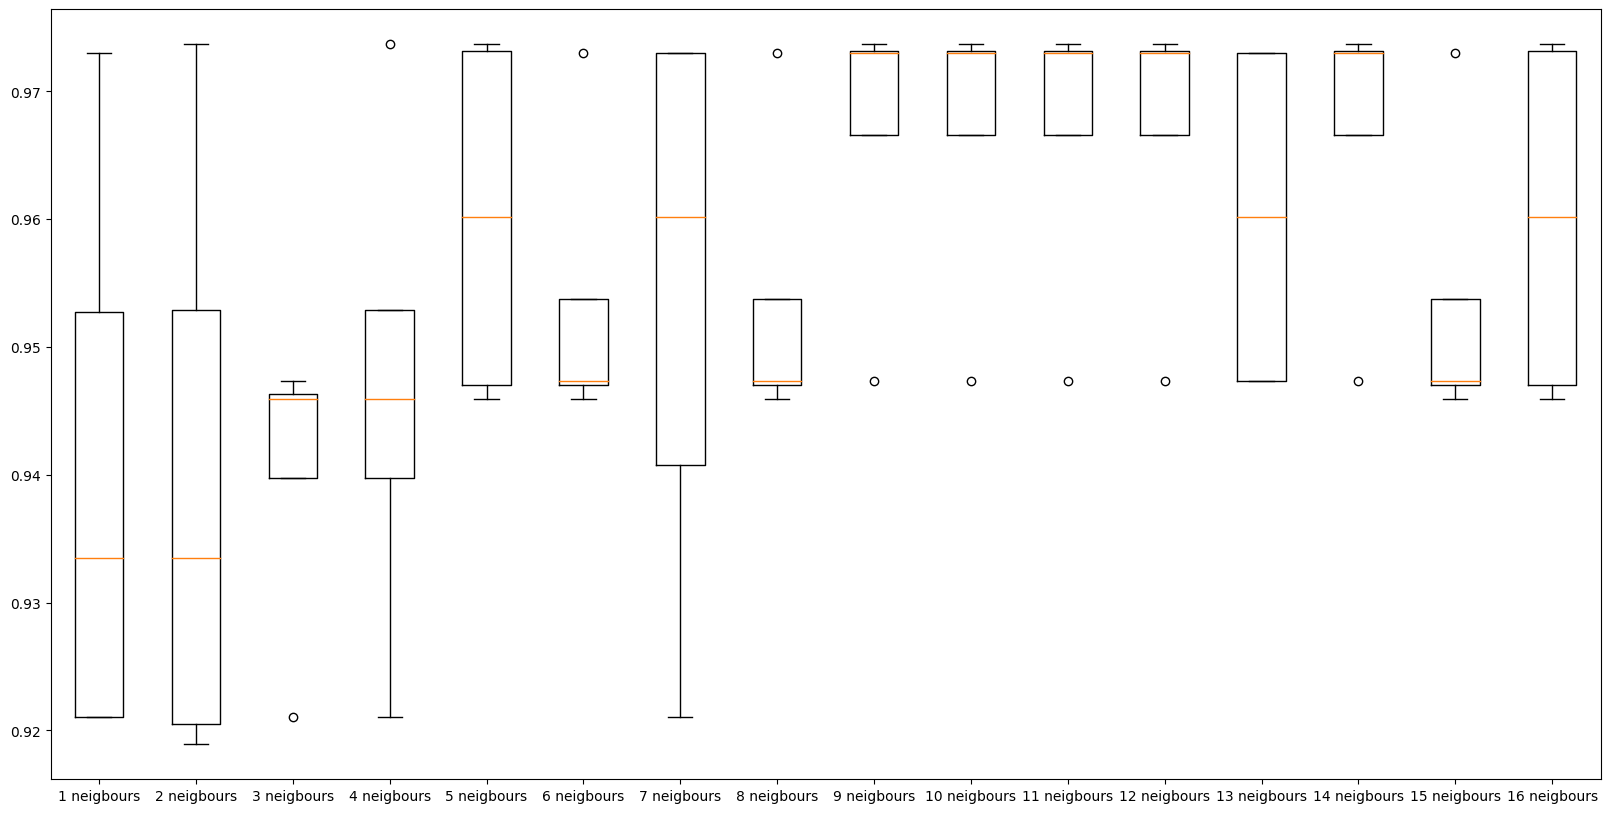

In [57]:
mean =[]

plt.figure(figsize=(20,10))
plt.boxplot(cv_scores.values(), labels=cv_scores.keys())
plt.show

The best model results are gotten when n_neighbors is 16.